### Importing packages and Data:

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

in this we import and assign the dataframe into the variable with name "cars"..

In [34]:
# importing data into cars variable

cars=pd.read_csv('autos_mpg.csv')

In [35]:
# Showing the details of the first 10 rows from the dataset
cars.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


## Data Pre-processing

In this we have to check the missing values, duplicate values ,outliers and handle these problems and also encoding data for machine learning


Exploring data :

In [36]:
# Check the shape oh the dataframe
cars.shape

(398, 9)

In [37]:
# Check the row lable index of the dataframe
cars.index

RangeIndex(start=0, stop=398, step=1)

In [38]:
# Check the info ,columns ,datatype and no of values present in the each column of the dataframe
cars.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Here horsepower column is in object type , so we have to change the data type

In [39]:
# Horse power column is in object type so we need to explore that columns
cars.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

This '?' symbol makes the whole column into object, we will need to fill the missing values or remove it to change the datatype , we will do under the missing value process

In [40]:
# Get statistical summary of numerical column in the dataset
cars.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


<li>Data Cleaning

    Handling Missing Values

In [41]:
# User defined function to find the missing values in a dataframe


from tabulate import tabulate
def missingvaluesin_table(data):
    # percentage of missingvalue
    total_percentage_missing = (((data.isnull() | data.isna() | (data == '') | (data == '0')).sum().sum()/ (data.size)) * 100).round(2)
    print("Total missing values in percentage:",total_percentage_missing,"%")
    
    # count missing values
    missing_values=(data.isnull() | data.isna() | (data == '') | (data == '0')).sum()
    # missing values in percentage
    missing_in_percentage=((missing_values/len(data))*100).round(2)
    
    # creating dataframe to show in tabulate view
    temp={"missing count":missing_values,"missing values in %":missing_in_percentage}
    temp_data=pd.DataFrame(temp)
    #print table
    print(tabulate(temp_data,headers='keys',tablefmt='pretty'))


we found missing values in horsepower column is filled with '?' symbol

In [42]:
# So Checking with '?' symbols in horse column
cars.loc[cars['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [43]:
# Changing the '?' symbol into nan values by using dictionary and replace function

nan_fill={'?':np.nan}

cars['horsepower']=cars['horsepower'].replace(nan_fill)

# Checking missing values in the dataframe

missingvaluesin_table(cars)

Total missing values in percentage: 0.17 %
+--------------+---------------+---------------------+
|              | missing count | missing values in % |
+--------------+---------------+---------------------+
|     mpg      |      0.0      |         0.0         |
|  cylinders   |      0.0      |         0.0         |
| displacement |      0.0      |         0.0         |
|  horsepower  |      6.0      |        1.51         |
|    weight    |      0.0      |         0.0         |
| acceleration |      0.0      |         0.0         |
|  model_year  |      0.0      |         0.0         |
|    origin    |      0.0      |         0.0         |
|   car_name   |      0.0      |         0.0         |
+--------------+---------------+---------------------+


Before handling the missing values we have to 
change the object datatype into float in horsepower column otherwise object of the filling method is filled 

In [44]:
# checking columns info
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [45]:
cars['horsepower']=cars['horsepower'].astype(float)

In [46]:
# Replacing the missing values with mean horsepower of cars with similar cylinders and model_year

cars['horsepower']=cars.groupby(['cylinders','model_year'])['horsepower'].transform(lambda x:x.fillna(x.mean()))

missingvaluesin_table(cars)

Total missing values in percentage: 0.0 %
+--------------+---------------+---------------------+
|              | missing count | missing values in % |
+--------------+---------------+---------------------+
|     mpg      |      0.0      |         0.0         |
|  cylinders   |      0.0      |         0.0         |
| displacement |      0.0      |         0.0         |
|  horsepower  |      0.0      |         0.0         |
|    weight    |      0.0      |         0.0         |
| acceleration |      0.0      |         0.0         |
|  model_year  |      0.0      |         0.0         |
|    origin    |      0.0      |         0.0         |
|   car_name   |      0.0      |         0.0         |
+--------------+---------------+---------------------+


    Handling duplicated values

In [47]:
# Checking for duplicated values 
cars.duplicated().sum()

np.int64(0)

In [48]:
# checking the column datatypes
cars.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

    Handling Outliers 

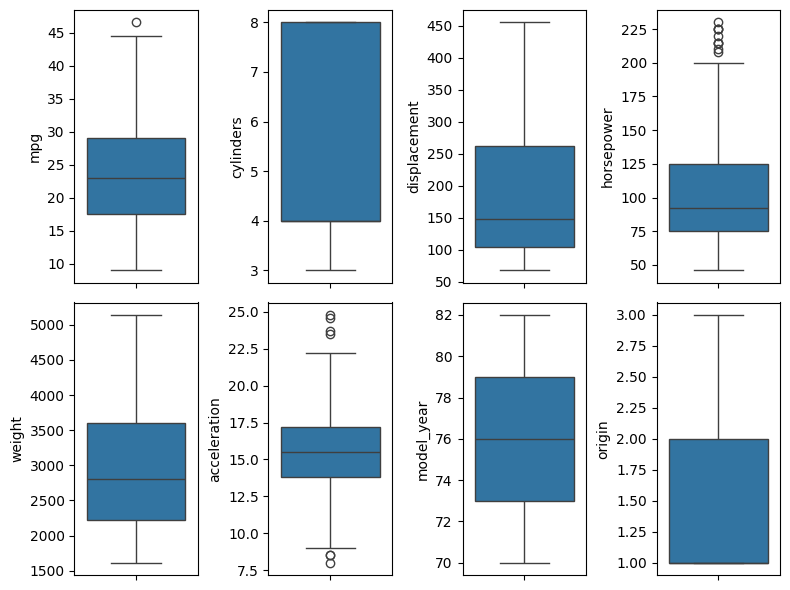

In [49]:
# Showing the outliers plot for the numeric data in the dataframe
def show_outlier(cars):
    plt.figure(figsize=(8,6))
    j=1
    for i in cars.select_dtypes(exclude='object').columns:
        plt.subplot(2,4,j)
        sns.boxplot(cars,y=i)
        j+=1
    plt.tight_layout()
    plt.show()

show_outlier(cars)

In the above diagram  Acceleration and mileage column has outliers. 

In [50]:
# finding the upper and lower limit of mileage and acceleration columns

def find_outlier_limits(col_name):
    Q1,Q3=cars[col_name].quantile([.25,.75])
    IQR=Q3-Q1
    low=Q1-(1.5* IQR)
    high=Q3+(1.5* IQR)
    return (high,low)

high_mpg,low_mpg=find_outlier_limits('mpg')
print('Mileage: ','upper limit: ',high_mpg,' lower limit: ',low_mpg)
high_acc,low_acc=find_outlier_limits('acceleration')
print('Acceleration: ','upper limit: ',high_acc,' lower limit:',low_acc)
high_hp,low_hp=find_outlier_limits('horsepower')
print('Horsepower :','upper limit: ',high_hp,' lower limit: ',low_hp )

Mileage:  upper limit:  46.25  lower limit:  0.25
Acceleration:  upper limit:  22.2  lower limit: 8.8
Horsepower : upper limit:  200.0  lower limit:  0.0


Replacing outlier values in horespower and acceleration columns  
with respective upper and lower limits

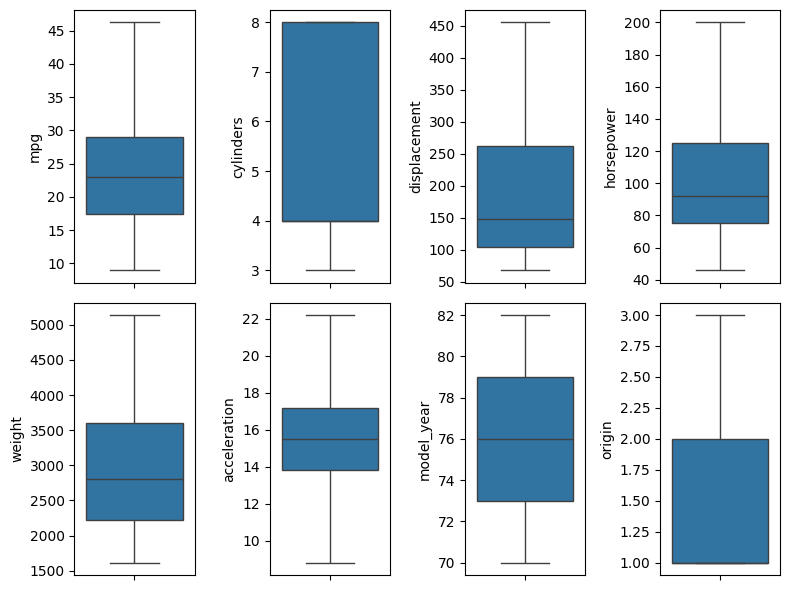

In [51]:
# replacing outliers using loc function

cars.loc[cars['mpg']>high_mpg,'mpg']=high_mpg
cars.loc[cars['acceleration']>high_acc,'acceleration']=high_acc
cars.loc[cars['acceleration']<low_acc,'acceleration']=low_acc
cars.loc[cars['horsepower']>high_hp,'horsepower']=high_hp

# showing box plot after handling outliers

show_outlier(cars)

<li>Data transformation and integration

     Feature Engineering

In [52]:
 
cars['company']=cars['car_name'].apply(lambda x:(x.split()[0]).strip())




In [53]:
#company column has some naming error, manually solving it
# Showing unique values

print(cars['company'].unique(),'\n')

company_corr={'chevroelt':'chevrolet','toyouta':'toyota','vokswagen':'volkswagen','maxda':'mazda','vw':'volkswagen','mercedes':'mercedes-benz'}
cars['company']=cars['company'].replace(company_corr)
print(cars['company'].unique())



['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'chevy' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'toyouta' 'maxda' 'honda' 'subaru' 'chevroelt' 'capri' 'vw'
 'mercedes-benz' 'cadillac' 'mercedes' 'vokswagen' 'triumph' 'nissan'] 

['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'chevy' 'hi'
 'mercury' 'opel' 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault'
 'honda' 'subaru' 'capri' 'mercedes-benz' 'cadillac' 'triumph' 'nissan']


By analyzing the car company name for specific region , origin 1 represents america,2 represents europe and 3 represents japan

In [54]:
cars.loc[cars['origin']==1,'company'].unique()
cars.loc[cars['origin']==2,'company'].unique()
cars.loc[cars['origin']==3,'company'].unique()

# so adding new column as contry and feed the contry name as specified origin
cars.loc[cars['origin']==1,'country']='America'
cars.loc[cars['origin']==2,'country']='Europe'
cars.loc[cars['origin']==3,'country']='Japan'
cars.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,company,country
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet,America
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick,America


In [55]:
# export the above csv file for charting purpose in streamlit data
cars.to_csv('chart.csv')

### EDA

Text(1, 80, 'usa:249\nEurope:70\nJapan:79')

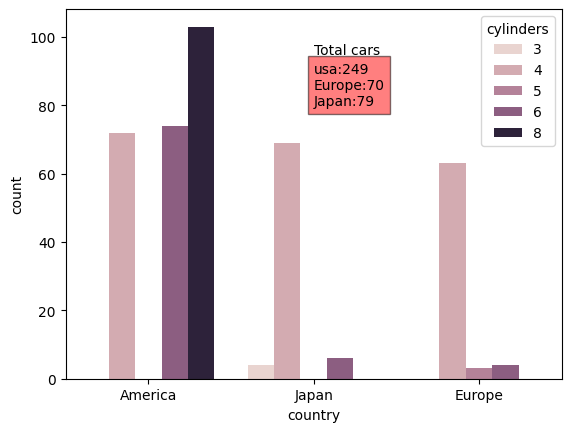

In [56]:
# Showing a cars count according to country
sns.countplot(data=cars,x='country',hue='cylinders' )
h=cars.groupby(['country'])['country'].count()
plt.text(1,95,'Total cars')
plt.text(1,80,f'usa:{h[0]}\nEurope:{h[1]}\nJapan:{h[2]}',bbox=dict(facecolor='red',alpha=0.5))

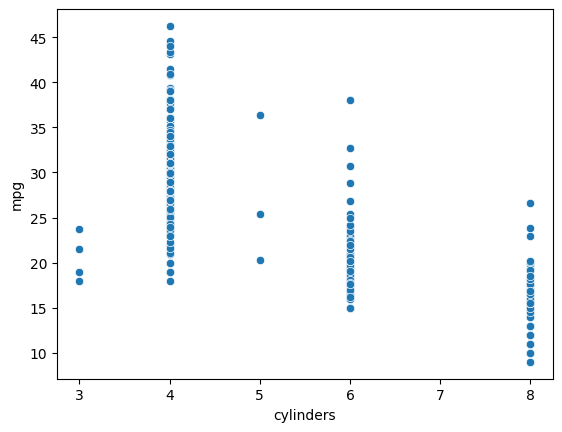

In [57]:
# A scatter plot helps to observe the relationship between variables.
# Scatter plot between cylinders and mpg columns of the DataFrame: cars_df

sns.scatterplot(data=cars,x='cylinders',y='mpg')
plt.show()

In [58]:
# Showing the mean,max,min mileage of the car for each country with according to the model year
mpg_pivot=pd.pivot_table(data=cars,values='mpg',index='model_year',columns='country',aggfunc=[np.mean,np.max,np.min])
mpg_pivot

mean                           max                   min  \
country       America     Europe      Japan America Europe  Japan America   
model_year                                                                  
70          15.272727  25.200000  25.500000    22.0   26.0  27.00     9.0   
71          18.100000  28.750000  29.500000    28.0   30.0  35.00    12.0   
72          16.277778  22.000000  24.200000    28.0   26.0  28.00    11.0   
73          15.034483  24.000000  20.000000    23.0   29.0  22.00    11.0   
74          18.333333  27.000000  29.333333    28.0   31.0  32.00    13.0   
75          17.550000  24.500000  27.500000    23.0   29.0  33.00    13.0   
76          19.431818  24.250000  28.000000    29.0   29.5  33.00    13.0   
77          20.722222  29.250000  27.416667    33.5   36.0  33.50    15.0   
78          21.772727  24.950000  29.687500    36.1   43.1  39.40    17.5   
79          23.478261  30.450000  32.950000    35.7   37.3  34.10    15.5   
80          25.914286  37.288889  35.373077    32.1   44.3  46.25    19.1   
81          27.530769  31.575000  32.958333    39.0   34.5  39.10    17.6   
82          29.450000  40.000000  34.888889    38.0   44.0  38.00    22.0   

                         
country    Europe Japan  
model_year               
70           24.0  24.0  
71           27.0  25.0  
72           18.0  19.0  
73           19.0  18.0  
74           24.0  24.0  
75           22.0  24.0  
76           16.5  19.0  
77           21.5  21.5  
78           16.2  21.1  
79           25.4  31.8  
80           29.8  23.7  
81           28.1  24.2  
82           36.0  31.0

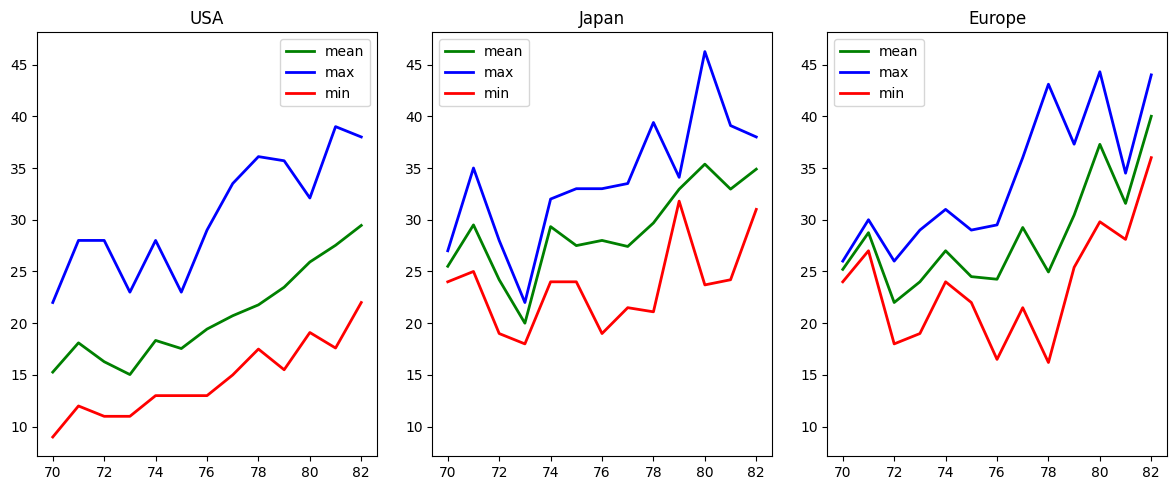

In [59]:

plt.figure(figsize=(12,5))

ax1=plt.subplot(1,3,1)
plt.title('USA')
plt.plot( mpg_pivot['mean']['America'],color='green', linewidth=2, label='mean' )
plt.plot( mpg_pivot['max']['America'],color='blue', linewidth=2, label='max' )
plt.plot( mpg_pivot['min']['America'],color='red', linewidth=2, label='min' )
plt.legend()
plt.subplot(1,3,2, sharey=ax1)
plt.title('Japan')
plt.plot( mpg_pivot['mean']['Japan'],color='green', linewidth=2, label='mean' )
plt.plot( mpg_pivot['max']['Japan'],color='blue', linewidth=2, label='max' )
plt.plot( mpg_pivot['min']['Japan'],color='red', linewidth=2, label='min' )
plt.legend()
plt.subplot(1,3,3, sharey=ax1)
plt.title('Europe')
plt.plot( mpg_pivot['mean']['Europe'],color='green', linewidth=2, label='mean' )
plt.plot( mpg_pivot['max']['Europe'],color='blue', linewidth=2, label='max' )
plt.plot(mpg_pivot['min']['Europe'],color='red', linewidth=2, label='min' )
plt.legend()
plt.tight_layout()

plt.show()


<Axes: >

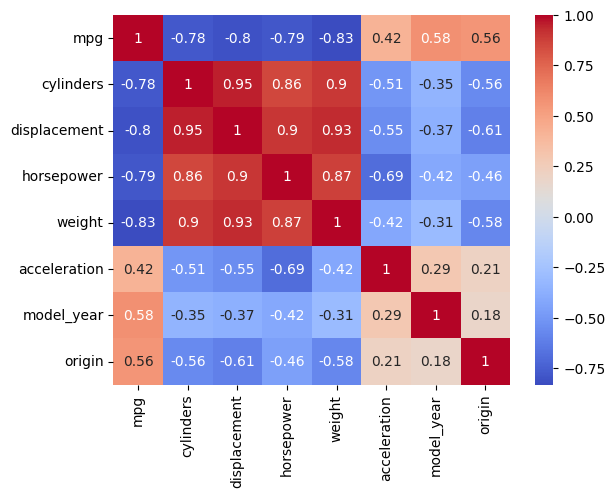

In [60]:
# checking co-relation of the dataframe

sns.heatmap(cars.select_dtypes(exclude='object').corr(),cmap='coolwarm',annot=True)

## Model Buildiing

In this we build a ML Model to Predict the mileage (mpg) of incoming cars

Predictors and Target:
<ul><li>The predictors are the variables that are used to predict the target. All columns excluding name,company and mpg are considered as predictors.
<li>The target variable is 'mpg' which has to be predicted.</ul>

In [61]:
#Creating matrix of predictors
x = cars.iloc[:,1:8]
#Setting target
y = cars.iloc[:, 0]
print(x)
print(y)

     cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            8         307.0       130.0    3504          12.0          70   
1            8         350.0       165.0    3693          11.5          70   
2            8         318.0       150.0    3436          11.0          70   
3            8         304.0       150.0    3433          12.0          70   
4            8         302.0       140.0    3449          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0    2790          15.6          82   
394          4          97.0        52.0    2130          22.2          82   
395          4         135.0        84.0    2295          11.6          82   
396          4         120.0        79.0    2625          18.6          82   
397          4         119.0        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

    Train and test data Split

The data must be divided into two parts. First, a training set on which model can be trained. Second, a testing set on which the model can be validated.

<b>sklearn.model_selection.train_test_split()</b> method divides the predictors (x) and the corresponding targets (y) into train data (X_train, y_train) and test data (X_test, y_test). It is a general practice to consider 20% of data for testing (test_size=0.2).

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 22)

In [63]:
# Showing the shape of the train and test data
print("Train dataset :  Predictors shape--",x_train.shape," , Target shape--",y_train.shape)
print("Test dataset  :  Predictors shape--",x_test.shape,"  , Target shape--",y_test.shape)

Train dataset :  Predictors shape-- (318, 7)  , Target shape-- (318,)
Test dataset  :  Predictors shape-- (80, 7)   , Target shape-- (80,)


     Scaling the dataset

Certain algorithms work well when all the columns are on the same scale. In order to achieve this, data can normalized using various scaler available in Scikit Learn library, such as Standard scaler, MinMax scaler, etc. 

When applying any transformation to the data, Scikit Learn applys the transformation in two phases - fit phase and transform phase. During the fit phase, the parameters required for the transformation are learnt. During the transform phase, the data is actually modified or altered.

Generally the fit phase is carried out with train data, and the parameters learnt are applied to transform both the train and the test data.

In [64]:
#Applying standard scaler on the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

# Training and Evaluation

    Linear Regression model

<li> Linear model Training

In [65]:
# fitting the model into training dataset 

from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)



LinearRegression()

<li> Linear model Evaluation

In [66]:
# predicting the values using linear models

li_y_pred=linear_model.predict(x_test)

# Calculating r2 score for testing dataset

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2 score:',r2_score(y_test,li_y_pred),'\n')

# Testing accuracy with k-fold cross validation

from sklearn.model_selection import cross_val_score
print('k-fold cross validation:',cross_val_score(linear_model,x,y,cv=6).mean())
print('='*60)
# evaluation of the model 
print("Mean absolute error: ",mean_absolute_error(y_test,li_y_pred),'\n')
linear_mse=mean_squared_error(y_test,li_y_pred)
print('Mean_squared_error: ',linear_mse,'\n')
print("Root mean squared error :",np.sqrt(linear_mse))
print("=="*30)


R2 score: 0.7797531815777196 

k-fold cross validation: 0.6657169432893628
Mean absolute error:  2.8741251209562613 

Mean_squared_error:  14.73398218354373 

Root mean squared error : 3.8384869653997433


    Random forest regressor

<li> Random foresr regressor model Training

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()

# optimizing and choosing the best random forest model Using gridsearchcv
from sklearn.model_selection import GridSearchCV

# giving different params to rf to get the best model
param_rf={'n_estimators':[100],'min_samples_split':list(range(2,10)),'min_samples_leaf':list(range(1,6)),'max_depth':list(range(5,51,5)),'max_features':['sqrt', 'log2']}

rf_grid=GridSearchCV(estimator=rf_model,param_grid=param_rf,cv=3)
# Training the model to get the best model
rf_grid.fit(x_train,y_train)
print('=='*30)
print(rf_grid.best_params_,'\n',rf_grid.best_score_,'\n','=='*30)

best_rf_model=rf_grid.best_estimator_

# train the best model with training daaset
best_rf_model.fit(x_train,y_train)




{'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100} 
 0.8665252328016319 


RandomForestRegressor(max_depth=15, max_features='log2', min_samples_split=4)

<li>Evaluation for Random forest Regressor

In [68]:
# predicting the values with best rf model
best_rf_y_pred=best_rf_model.predict(x_test)

# accuracy score of model with testing data
print("best rf model R2 score: ",r2_score(y_test,best_rf_y_pred))
print("k=fold cross validation:",cross_val_score(best_rf_model,x_train,y_train,cv=5).mean())
print("=="*30)

# evaluation of the model 
print("Mean absolute error: ",mean_absolute_error(y_test,best_rf_y_pred),'\n')
rf_mse=mean_squared_error(y_test,best_rf_y_pred)
print('Mean_squared_error: ',rf_mse,'\n')
print("Root mean squared error :",np.sqrt(rf_mse))
print("=="*30)



best rf model R2 score:  0.8731945262643492
k=fold cross validation: 0.8606884626287001
Mean absolute error:  2.201699353592313 

Mean_squared_error:  8.482981067243859 

Root mean squared error : 2.912555762083167


    SVM Regressor

<li>SVM Training

In [69]:
# importing the model
from sklearn.svm import SVR
svregressor=SVR()
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10,9, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}
# try with different parameters for get best model and train it
svm_grid=GridSearchCV(estimator=svregressor,param_grid=param_grid,cv=5)
svm_grid.fit(x_train,y_train)
print('=='*30)
print("SVR best params: ",svm_grid.best_params_,"\nBest_score: ",svm_grid.best_score_,'\n','=='*30)
svm_model=svm_grid.best_estimator_



SVR best params:  {'C': 10, 'epsilon': 0.2, 'gamma': 0.1, 'kernel': 'rbf'} 
Best_score:  0.8692456932394755 


<li>Evaluation of svm

In [70]:
# predicting the values with best rf model
svm_y_pred=svm_model.predict(x_test)

# accuracy score of model with testing data
print("best svm model R2 score: ",r2_score(y_test,svm_y_pred))
print("k=fold cross validation:",cross_val_score(svm_model,x_train,y_train,cv=5).mean())
print("=="*30)

# evaluation of the model 
print("Mean absolute error: ",mean_absolute_error(y_test,svm_y_pred),'\n')
svm_mse=mean_squared_error(y_test,svm_y_pred)
print('Mean_squared_error: ',svm_mse,'\n')
print("Root mean squared error :",np.sqrt(svm_mse))
print("=="*30)

best svm model R2 score:  0.8670083150578237
k=fold cross validation: 0.8692456932394755
Mean absolute error:  2.179078151038314 

Mean_squared_error:  8.896823711389704 

Root mean squared error : 2.9827543833493406


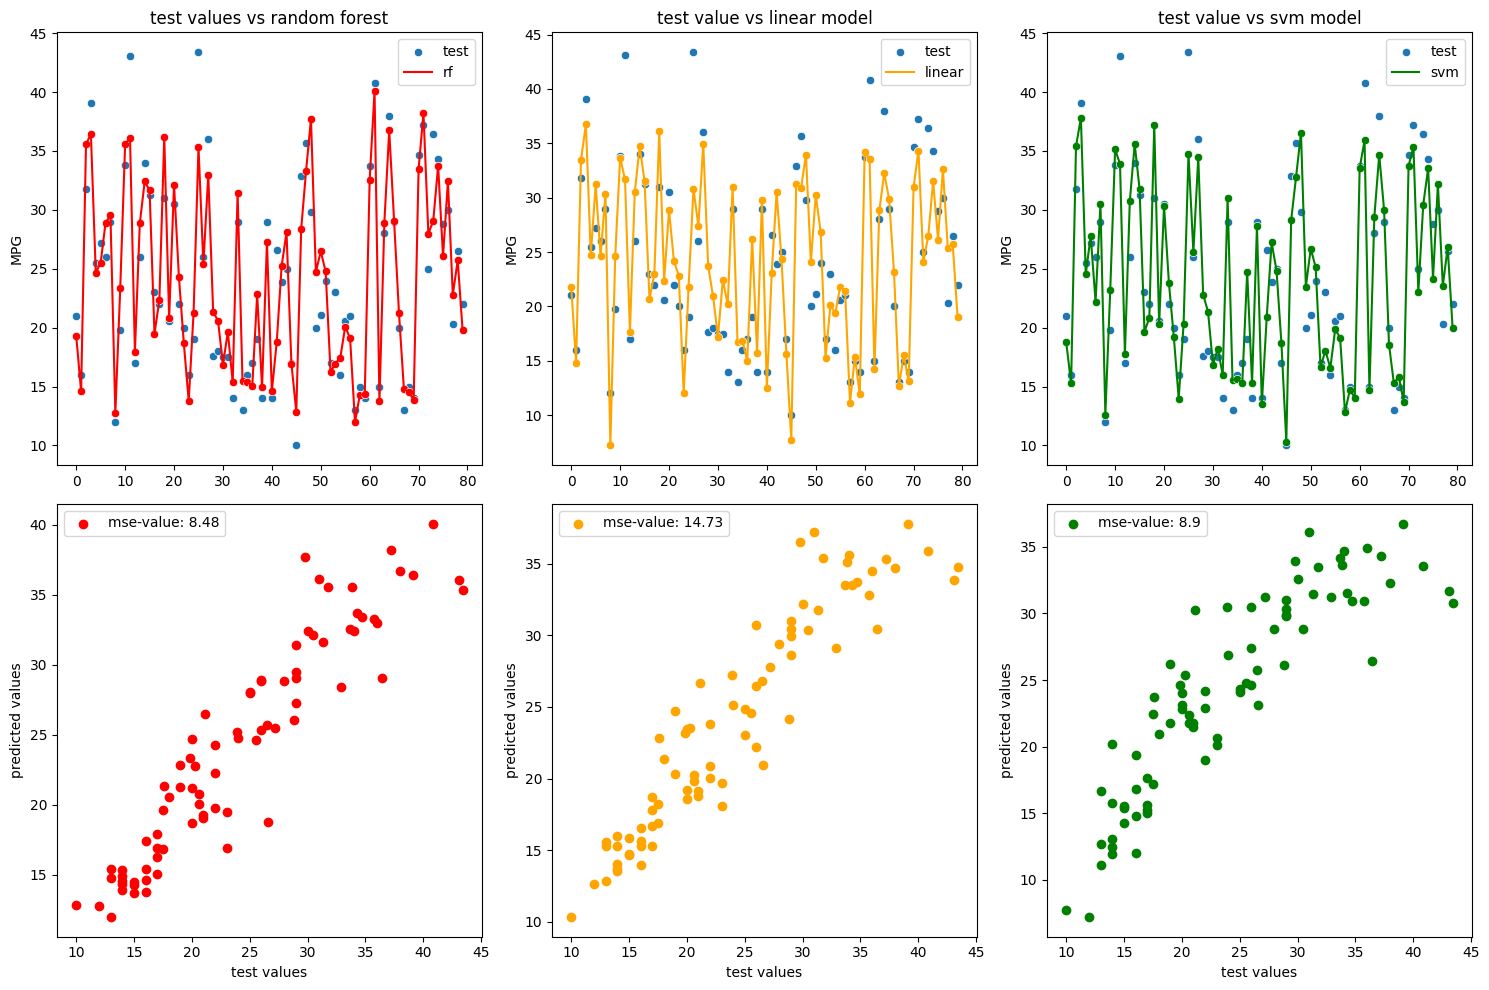

In [71]:
# model comparion of best rf model ,linear model with test values

plt.figure(figsize=(15,10))

# 1st graph for plotting test values and rf model predicted values
plt.subplot(2,3,1)
sns.scatterplot(data=y_test.reset_index()['mpg'],label="test")
sns.lineplot(data=best_rf_y_pred,label='rf',color='red')
sns.scatterplot(data=best_rf_y_pred,color='red')
plt.title('test values vs random forest')
plt.ylabel('MPG')
plt.subplot(2,3,4)
plt.scatter(y_test,best_rf_y_pred,label=f'mse-value: {rf_mse.round(2)}',color='red')
plt.xlabel('test values')
plt.ylabel('predicted values')
plt.legend()

# 2nd graph for plotting test values and linear model predicted values
plt.subplot(2,3,2)
sns.scatterplot(data=y_test.reset_index()['mpg'],label="test")
sns.scatterplot(data=li_y_pred,color='orange')
sns.lineplot(data=li_y_pred,label='linear',color='orange')
plt.title('test value vs linear model')
plt.ylabel('MPG')
plt.subplot(2,3,5)
plt.scatter(y_test,svm_y_pred,label=f'mse-value: {linear_mse.round(2)}',color='orange')
plt.xlabel('test values')
plt.ylabel('predicted values')
plt.legend()

#3rd graph for plotting
plt.subplot(2,3,3)
sns.scatterplot(data=y_test.reset_index()['mpg'],label="test")
sns.lineplot(data=svm_y_pred,label='svm',color='green')
sns.scatterplot(data=svm_y_pred,color='green')
plt.title('test value vs svm model')
plt.ylabel('MPG')
plt.subplot(2,3,6)
plt.scatter(y_test,li_y_pred,label=f'mse-value: {svm_mse.round(2)}',color='green')
plt.xlabel('test values')
plt.ylabel('predicted values')
plt.legend()

plt.tight_layout()
plt.legend()
plt.show()

Compare to these models random forest regressor has least mean square error and high accuracy so we choose random forest regressor as final model for this prediction


# Model's interpretation

<li> The below chart explains how the feature variables influeced in predicting the target variables 

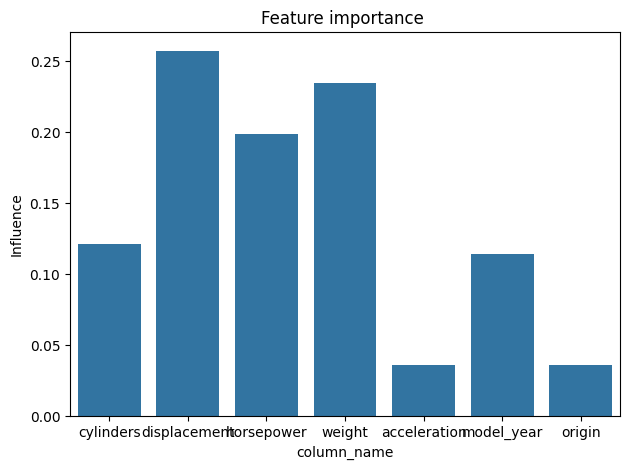

In [72]:

final_model=best_rf_model
# creating dataframe for feature importance
feature={'column_name':x.columns,'features':final_model.feature_importances_}
feature=pd.DataFrame(feature)
#feature=feature.sort_values(by='features',ascending=False)
# Showing feature importance of the column respective with random forest model
sns.barplot(data=feature,x='column_name',y='features')
plt.title('Feature importance ')
plt.ylabel('Influence')
plt.tight_layout()


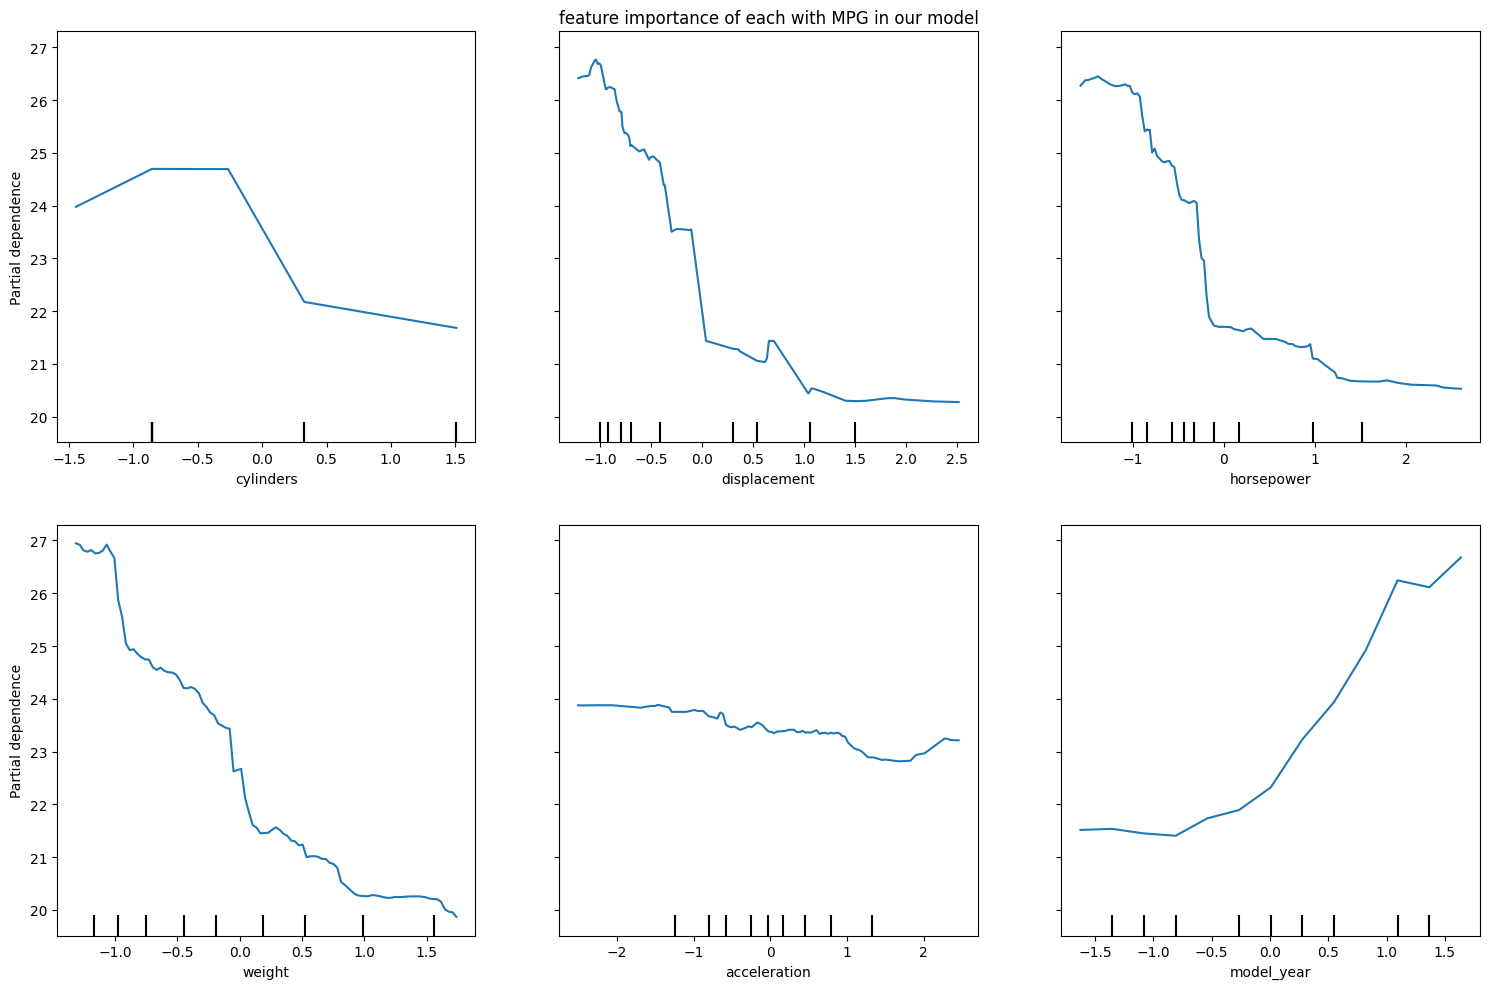

In [73]:
from sklearn.inspection import PartialDependenceDisplay

# Plot partial dependence for the most important features
features_to_plot = feature['column_name'].head(6).tolist()
fig, ax = plt.subplots(figsize=(15, 10))

PartialDependenceDisplay.from_estimator(final_model, x_train,features_to_plot, feature_names=x.columns, ax=ax)
ax.set_title('feature importance of each with MPG in our model')
plt.tight_layout()
plt.show()

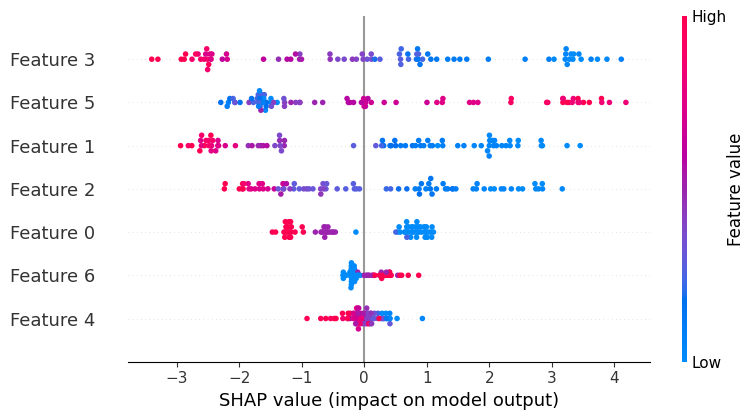

In [74]:
# Initialize the SHAP explainer
import shap
explainer = shap.Explainer(final_model, x_train)
shap_values = explainer(x_test,check_additivity=False)
shap.summary_plot(shap_values, x_test)

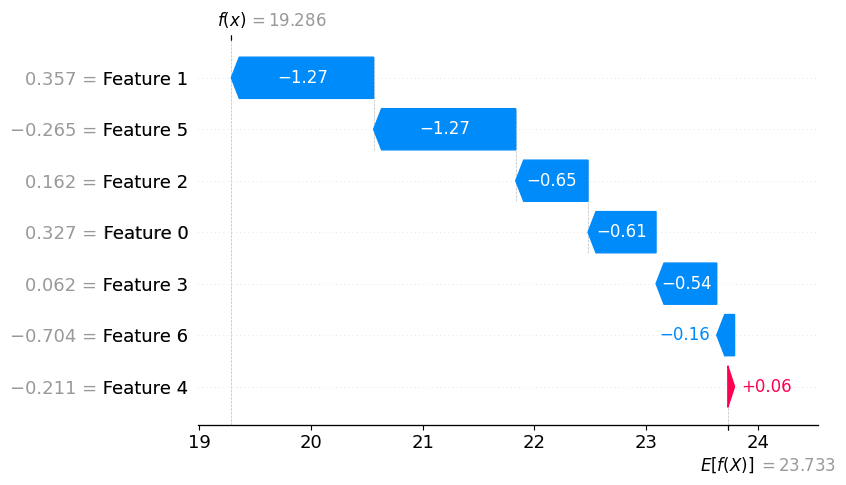

In [75]:
shap.plots.waterfall(shap_values[0])

# Export model for deployment

In [76]:


# predicting the value by giving new instances
car={'cylinders':[6], 'displacement':[120], 'horsepower':[70], 'weight':[2500], 'acceleration':[30.5],'model_year':[88], 'origin':[2]}
car=pd.DataFrame(car)
car=scale.transform(car)
print(final_model.predict(car))


[29.80669286]


In [77]:
# exporting the model and scaling 
from joblib import dump
dump(scale,'StandardScaler.joblib')
dump(final_model,'model.joblib')

['model.joblib']

In [78]:
# dump extra model 
dump(svm_model,'svm_model.joblib')

['svm_model.joblib']

In [79]:
cars.head

<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          22.2   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                   car_name     company  country  
0            70       1  chevro